# Smell Loss Monte Carlo Simulation

## Purpose
This project seeks to explore the health risks leading to smell loss across the U.S. population. This will be done using three datasets. The 2012 and 2014 versions of the National Health and Nutrition Examination Survey both of which include evaluation of smell and taste function, as well as data collected by the Global Consortium for Chemosensory Research on COVID-19 symptoms including smell loss and various health and lifestyle factors.

## Hypotheses
Geographic & Smoking: Areas with higher smoking levels in 2011-2012 will have higher probability smell loss in 2013-2014.

Taste & Flavor: Loss of smell will be correlated with loss of flavor but not loss of taste.

Income & Smell: Areas with higher income will have a lower probability of smell loss.

## Design
### Variables
- smoking
- age
- income

## Results

In [18]:
import matplotlib.pyplot as plt
import numpy as np

from smell_loss_simulation import run_simulation, calculate_smoking_probability, calculate_smell_loss_probability

pop_size = 1000
iterations = 100
infection_distance = 5

In [19]:
simulations = {}
for year in [2011, 2014, 2021]:
    smell_loss, population = run_simulation(pop_size, iterations, infection_distance, year)
    simulations[year] = {'smell_loss': smell_loss, 'population': population}

Iteration   0: Smell Loss Percentage: 6.43%
Iteration   1: Smell Loss Percentage: 13.39%
Iteration   2: Smell Loss Percentage: 13.20%
Iteration   3: Smell Loss Percentage: 12.50%
Iteration   4: Smell Loss Percentage: 13.11%
Iteration   5: Smell Loss Percentage: 10.14%
Iteration   6: Smell Loss Percentage: 10.00%
Iteration   7: Smell Loss Percentage: 4.00%
Iteration   8: Smell Loss Percentage: 0.00%
Iteration   9: Smell Loss Percentage: 0.00%
Iteration  10: Smell Loss Percentage: 0.00%
Iteration  11: Smell Loss Percentage: 0.00%
Iteration  12: Smell Loss Percentage: 0.00%
Iteration  13: Smell Loss Percentage: 0.00%
Iteration  14: Smell Loss Percentage: 0.00%
Iteration  15: Smell Loss Percentage: 0.00%
Iteration  16: Smell Loss Percentage: 0.00%
Iteration  17: Smell Loss Percentage: 0.00%
Iteration  18: Smell Loss Percentage: 0.00%
Iteration  19: Smell Loss Percentage: 0.00%
Iteration  20: Smell Loss Percentage: 0.00%
Iteration  21: Smell Loss Percentage: 0.00%
Iteration  22: Smell Loss 

## Smell loss based on viral infection (COVID-19 or flu/cold) for each year

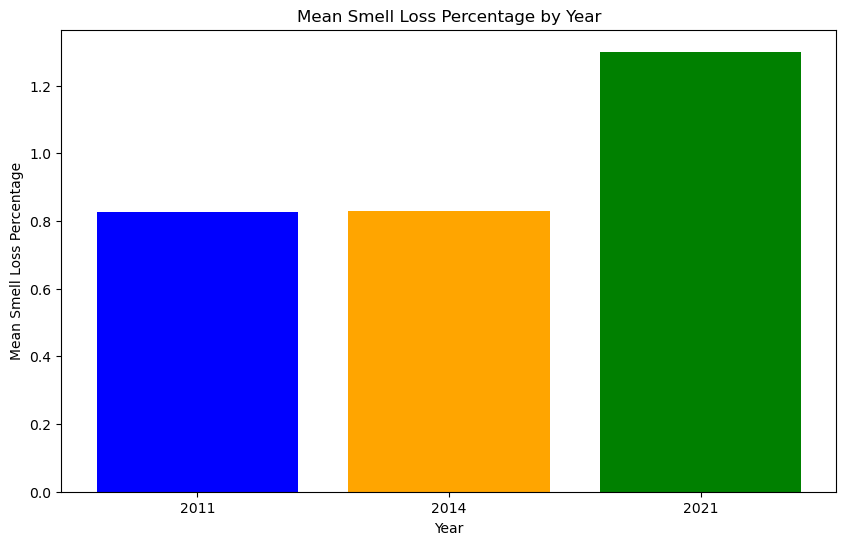

In [20]:
# Plot mean smell loss percentage by year
plt.figure(figsize=(10, 6))
mean_smell_loss = [np.mean(simulations[year]['smell_loss']) for year in simulations]
plt.bar(['2011', '2014', '2021'], mean_smell_loss, color=['blue', 'orange', 'green'])
plt.title('Mean Smell Loss Percentage by Year')
plt.xlabel('Year')
plt.ylabel('Mean Smell Loss Percentage')
plt.show()

## Age distribution of the population

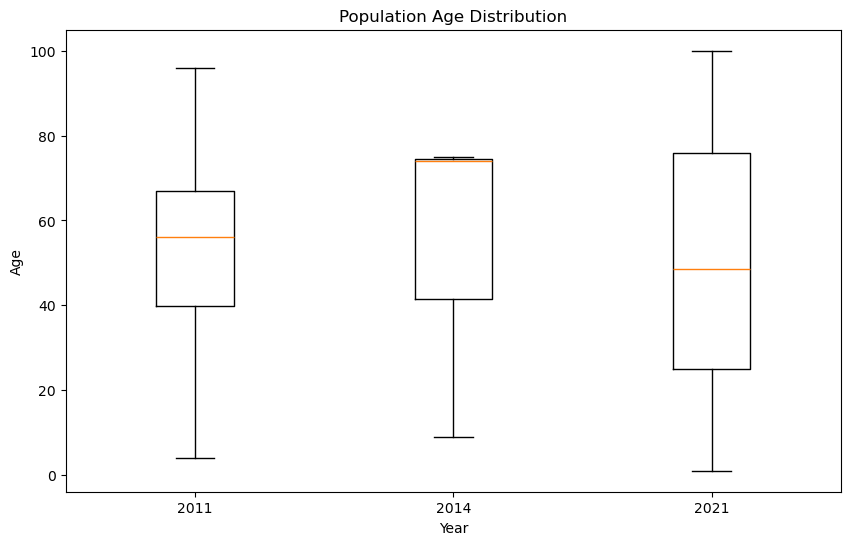

In [8]:
# Plot population ages
plt.figure(figsize=(10, 6))
population_ages = [[person.age for person in simulations[year]['population']] for year in simulations]
plt.boxplot(population_ages, labels=['2011', '2014', '2021'])
plt.title('Population Age Distribution')
plt.xlabel('Year')
plt.ylabel('Age')
plt.show()

## Hypothesis 1: Higher smoking levels in 2011-2012 will lead to higher smell loss in 2013-2014

In [10]:
aggregate_stats_2011_2012, population_2011_2012 = run_simulation(pop_size, iterations, infection_distance, year=2011)
smoking_prob_2011_2012 = calculate_smoking_probability(2011)
num_smokers_2011_2012 = (sum(person.is_smoker for person in population_2011_2012) / pop_size) * 100
num_smell_loss_2011_2012 = (sum(person.smell_loss for person in population_2011_2012) / pop_size) * 100
num_taste_loss_2011_2012 = (sum(person.taste_loss for person in population_2011_2012) / pop_size) * 100
num_flavor_loss_2011_2012 = (sum(person.flavor_loss for person in population_2011_2012) / pop_size) * 100

aggregate_stats_2013_2014, population_2013_2014 = run_simulation(pop_size, iterations, infection_distance, year=2014)
smoking_prob_2013_2014 = calculate_smoking_probability(2014)
smell_loss_prob_2013_2014 = calculate_smell_loss_probability(2014)
num_smokers_2013_2014 = (sum(person.is_smoker for person in population_2013_2014) / pop_size) * 100
num_smell_loss_2013_2014 = (sum(person.smell_loss for person in population_2013_2014) / pop_size) * 100
num_taste_loss_2013_2014 = (sum(person.taste_loss for person in population_2013_2014) / pop_size) * 100
num_flavor_loss_2013_2014 = (sum(person.flavor_loss for person in population_2013_2014) / pop_size) * 100

aggregate_stats_2020_2021, population_2020_2021 = run_simulation(pop_size, iterations, infection_distance, year=2021)
smoking_prob_2020_2021 = calculate_smoking_probability(2021)
num_smokers_2020_2021 = (sum(person.is_smoker for person in population_2020_2021) / pop_size) * 100
num_smell_loss_2020_2021 = (sum(person.smell_loss for person in population_2020_2021) / pop_size) * 100
num_taste_loss_2020_2021 = (sum(person.taste_loss for person in population_2020_2021) / pop_size) * 100
num_flavor_loss_2020_2021 = (sum(person.flavor_loss for person in population_2020_2021) / pop_size) * 100


print("Smoking levels in 2011-2012:", smoking_prob_2011_2012)
print("Smell loss probability in 2013-2014:", smell_loss_prob_2013_2014)

Iteration   0: Smell Loss Percentage: 4.12%
Iteration   1: Smell Loss Percentage: 7.15%
Iteration   2: Smell Loss Percentage: 8.06%
Iteration   3: Smell Loss Percentage: 7.33%
Iteration   4: Smell Loss Percentage: 9.16%
Iteration   5: Smell Loss Percentage: 7.79%
Iteration   6: Smell Loss Percentage: 6.38%
Iteration   7: Smell Loss Percentage: 0.00%
Iteration   8: Smell Loss Percentage: 0.00%
Iteration   9: Smell Loss Percentage: 0.00%
Iteration  10: Smell Loss Percentage: 0.00%
Iteration  11: Smell Loss Percentage: 0.00%
Iteration  12: Smell Loss Percentage: 0.00%
Iteration  13: Smell Loss Percentage: 0.00%
Iteration  14: Smell Loss Percentage: 0.00%
Iteration  15: Smell Loss Percentage: 0.00%
Iteration  16: Smell Loss Percentage: 0.00%
Iteration  17: Smell Loss Percentage: 0.00%
Iteration  18: Smell Loss Percentage: 0.00%
Iteration  19: Smell Loss Percentage: 0.00%
Iteration  20: Smell Loss Percentage: 0.00%
Iteration  21: Smell Loss Percentage: 0.00%
Iteration  22: Smell Loss Percen

## Hypothesis 2: Loss of smell will be correlated with loss of flavor but not loss of taste.

In [24]:
years = [2011, 2014, 2021]

results = {}
for year in years:
    smell_loss_prob, flavor_loss_prob, taste_loss_prob = [], [], []
    for _ in range(iterations):
        _, population = run_simulation(pop_size, 1, infection_distance, year)
        smell_loss = sum(person.smell_loss for person in population)
        flavor_loss = sum(person.flavor_loss for person in population)
        taste_loss = sum(person.taste_loss for person in population)
        total_population = len(population)
        smell_loss_prob.append(smell_loss / total_population)
        flavor_loss_prob.append(flavor_loss / total_population)
        taste_loss_prob.append(taste_loss / total_population)
    results[year] = {
        'smell_loss_prob': smell_loss_prob,
        'flavor_loss_prob': flavor_loss_prob,
        'taste_loss_prob': taste_loss_prob
    }

correlation_results = {}
for year, data in results.items():
    smell_loss_prob = data['smell_loss_prob']
    flavor_loss_prob = data['flavor_loss_prob']
    taste_loss_prob = data['taste_loss_prob']
    correlation_smell_flavor = np.corrcoef(smell_loss_prob, flavor_loss_prob)[0, 1]
    correlation_smell_taste = np.corrcoef(smell_loss_prob, taste_loss_prob)[0, 1]
    correlation_flavor_taste = np.corrcoef(flavor_loss_prob, taste_loss_prob)[0, 1]
    correlation_results[year] = {
        'correlation_smell_flavor': correlation_smell_flavor,
        'correlation_smell_taste': correlation_smell_taste,
        'correlation_flavor_taste': correlation_flavor_taste
    }

for year, data in correlation_results.items():
    print(f"Year: {year}")
    print(f"Correlation between smell loss and flavor loss: {data['correlation_smell_flavor']:.2f}")
    print(f"Correlation between smell loss and taste loss: {data['correlation_smell_taste']:.2f}")
    print(f"Correlation between flavor loss and taste loss: {data['correlation_flavor_taste']:.2f}")
    print()

Iteration   0: Smell Loss Percentage: 2.61%
Iteration   0: Smell Loss Percentage: 3.72%
Iteration   0: Smell Loss Percentage: 4.42%
Iteration   0: Smell Loss Percentage: 2.71%
Iteration   0: Smell Loss Percentage: 4.12%
Iteration   0: Smell Loss Percentage: 4.62%
Iteration   0: Smell Loss Percentage: 5.23%
Iteration   0: Smell Loss Percentage: 3.02%
Iteration   0: Smell Loss Percentage: 3.01%
Iteration   0: Smell Loss Percentage: 4.72%
Iteration   0: Smell Loss Percentage: 4.12%
Iteration   0: Smell Loss Percentage: 5.23%
Iteration   0: Smell Loss Percentage: 2.41%
Iteration   0: Smell Loss Percentage: 3.92%
Iteration   0: Smell Loss Percentage: 5.33%
Iteration   0: Smell Loss Percentage: 2.31%
Iteration   0: Smell Loss Percentage: 4.92%
Iteration   0: Smell Loss Percentage: 5.83%
Iteration   0: Smell Loss Percentage: 3.82%
Iteration   0: Smell Loss Percentage: 3.62%
Iteration   0: Smell Loss Percentage: 3.11%
Iteration   0: Smell Loss Percentage: 3.92%
Iteration   0: Smell Loss Percen

## Hypothesis 3: Lower income will be correlated with smell loss

In [25]:
years = [2011, 2014]

results = {}
for year in years:
    smell_loss_prob, poverty_prob = [], []
    for _ in range(iterations):
        _, population = run_simulation(pop_size, 1, infection_distance, year)
        smell_loss = sum(person.smell_loss for person in population)
        poverty = sum(person.poverty for person in population)
        total_population = len(population)
        smell_loss_prob.append(smell_loss / total_population)
        poverty_prob.append(poverty / total_population)
    results[year] = {
        'smell_loss_prob': smell_loss_prob,
        'poverty_prob': poverty_prob
    }

correlation_results = {}
for year, data in results.items():
    smell_loss_prob = data['smell_loss_prob']
    poverty_prob = data['poverty_prob']
    correlation_smell_poverty = np.corrcoef(smell_loss_prob, poverty_prob)[0, 1]
    correlation_results[year] = {
        'correlation_smell_poverty': correlation_smell_poverty
    }

for year, data in correlation_results.items():
    print(f"Year: {year}")
    print(f"Correlation between smell loss and poverty: {data['correlation_smell_poverty']:.2f}")
    print()


Iteration   0: Smell Loss Percentage: 5.13%
Iteration   0: Smell Loss Percentage: 2.61%
Iteration   0: Smell Loss Percentage: 3.31%
Iteration   0: Smell Loss Percentage: 5.03%
Iteration   0: Smell Loss Percentage: 4.82%
Iteration   0: Smell Loss Percentage: 2.61%
Iteration   0: Smell Loss Percentage: 4.62%
Iteration   0: Smell Loss Percentage: 4.82%
Iteration   0: Smell Loss Percentage: 3.62%
Iteration   0: Smell Loss Percentage: 5.53%
Iteration   0: Smell Loss Percentage: 4.22%
Iteration   0: Smell Loss Percentage: 4.92%
Iteration   0: Smell Loss Percentage: 4.52%
Iteration   0: Smell Loss Percentage: 3.82%
Iteration   0: Smell Loss Percentage: 3.42%
Iteration   0: Smell Loss Percentage: 4.02%
Iteration   0: Smell Loss Percentage: 2.31%
Iteration   0: Smell Loss Percentage: 4.82%
Iteration   0: Smell Loss Percentage: 3.62%
Iteration   0: Smell Loss Percentage: 5.02%
Iteration   0: Smell Loss Percentage: 3.61%
Iteration   0: Smell Loss Percentage: 3.12%
Iteration   0: Smell Loss Percen